In [1]:
pip install deepface


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade deepface tensorflow keras



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

2024-06-29 22:56:10.174241: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


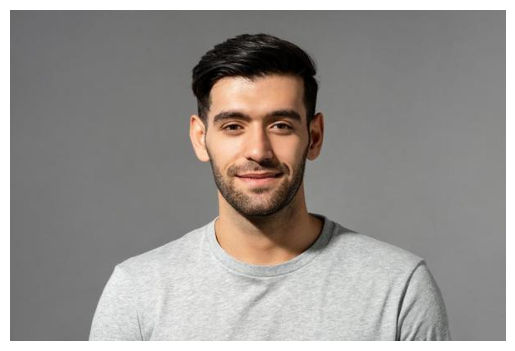

In [4]:
image_path = 'kaggle/input/image2/man.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [5]:

result = DeepFace.analyze(image_path, actions=['age', 'gender', 'race', 'emotion'])

print(result)

Action: emotion:  75%|███████▌  | 3/4 [00:37<00:11, 11.49s/it]

24-06-29 22:57:03 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /Users/apple/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 3.76MB/s]
Action: emotion: 100%|██████████| 4/4 [00:42<00:00, 10.72s/it]

[{'age': 27, 'region': {'x': 220, 'y': 78, 'w': 161, 'h': 161, 'left_eye': (324, 140), 'right_eye': (268, 139)}, 'face_confidence': 0.9, 'gender': {'Woman': 1.689104891511306e-05, 'Man': 99.99998807907104}, 'dominant_gender': 'Man', 'race': {'asian': 0.0013847597074345686, 'indian': 0.25844050105661154, 'black': 0.000601442479819525, 'white': 44.846346974372864, 'middle eastern': 50.02673864364624, 'latino hispanic': 4.866491258144379}, 'dominant_race': 'middle eastern', 'emotion': {'angry': 0.0005810190032207174, 'disgust': 3.268028615733762e-12, 'fear': 6.597903166039032e-05, 'happy': 77.80060768127441, 'sad': 0.00755722212488763, 'surprise': 0.0003095934971497627, 'neutral': 22.19087779521942}, 'dominant_emotion': 'happy'}]


Age: 27, Gender: Man,  Region: middle eastern, Emotion: happy


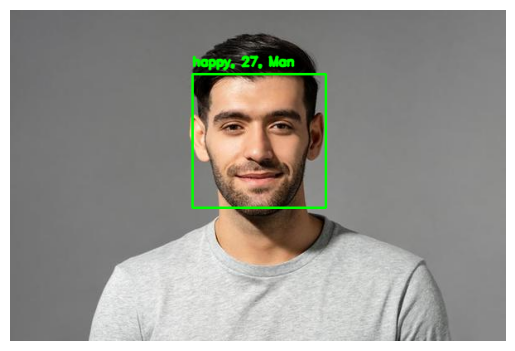

In [6]:
# Display the structure of the result
for res in result:
      print(f"Age: {res['age']}, Gender: {res['dominant_gender']},  Region: {res['dominant_race']}, Emotion: {res['dominant_emotion']}")

#Adjusted code for drawing rectangles and annotations
for face in result:
    region = face['region']
    x, y, w, h = region['x'], region['y'], region['w'], region['h']
    
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image_rgb, 
                f"{face['dominant_emotion']}, {face['age']}, {face['dominant_gender']}", 
                (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 
                2, 
                cv2.LINE_AA)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()